<a href="https://colab.research.google.com/github/shuchimishra/Tensorflow_projects/blob/main/handy_snippets/Load_method_in_TensorFlow_Datasets_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to TensorFlow Datasets Library**
Before we begin we need to install the TensorFlow Datasets Library. (it comes preinstalled on Google Collab ). Please run the following to install the tfds library on your machine.

In [ ]:
# pip install -q tfds

Once the library has been installed next we can download and load the datasets and start working with it.

The easiest way to download and load a dataset for your experiment is to use the tfds.load() method. The first argument to the load function is the name of dataset that you want to download here since we are using MNIST data we pass the string ‘mnist’. The [catalog](https://www.tensorflow.org/datasets/catalog/overview) lists an exhaustive list of datasets avilable.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

ds = tfds.load('mnist', split='train', shuffle_files=True)
print(ds)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


The above code does the following:

It downloads the mnist dataset (as a tfrecord)
Loads the data in the form of tf.data.Dataset (from the downloaded tfrecord)
Now you can manipulate the dataset so loaded and build your pipeline around it. One of the most important reasons I use tfds is that it loads the datasets avilable as a tf.data.Datasets which helps me elimnate a load of loading and tranforming process.

# **A few important methods of TensorFlow Datasets Library**
Since tfds is a library which helps us load the datasets into memory, we will be dealing with tfds.load a lot so let us take a look in detail about the various arguments that it supports.

Methods of tfds.load()

*split=:* Which split to read (e.g. 'train', ['train', 'test'], 'train[80%:]',...)

*shuffle_files=:* Control whether to shuffle the files between each epoch.

*data_dir=:* Location where the dataset is saved ( defaults to ~/tensorflow_datasets/)

*with_info=True:* Returns the tfds.core.DatasetInfo containing dataset metadata
download=False: Disable download

*as_supervised=True,* you can get a tuple (features, label) instead for supervised datasets.

***a. Load with with_info=True***

Let’s check what info we get when we set with_info=True when we load our datasets. It gives the details about the dataset

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds


ds2, info = tfds.load('mnist', split='train', with_info=True)
print(ds2)


print(info)

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna a

**b. Load with as_supervised=True**

In [ ]:
import tensorflow_datasets as tfds

ds3 = tfds.load('mnist', split='train', as_supervised=True)
ds3 = ds3.take(1)

for image, label in ds3:  # example is (image, label)
  print(image.shape)
  print(label)

(28, 28, 1)
tf.Tensor(4, shape=(), dtype=int64)


In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'], #80% data for training, 10% for validation, 10% for testing
    with_info=True,
    as_supervised=True,
)

print(train_ds.cardinality().numpy()) #prints the count of images in training dataset
print(val_ds.cardinality().numpy()) #prints the count of images in validation dataset
print(test_ds.cardinality().numpy()) #prints the count of images in testing dataset

2936
367
367


Let's retrieve an image from the dataset and use it to demonstrate data augmentation.

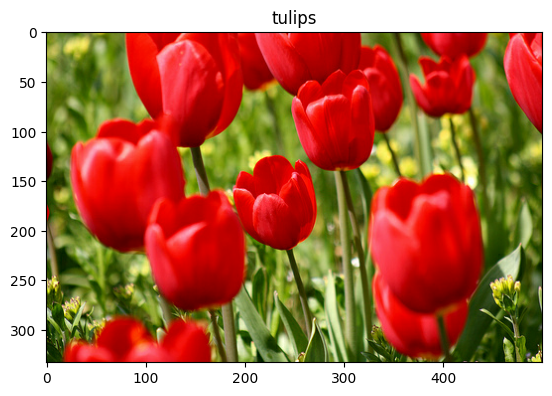

In [ ]:
import matplotlib.pyplot as plt

get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [ ]:
print(metadata)

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/root/tensorflow_datasets/tf_flowers/3.0.1.incompleteZPV0WS',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


In [ ]:

#The flowers dataset has five classes.
num_classes = metadata.features['label'].num_classes
print(num_classes)

5
